The Meebits NFT collection is the latest project from [Larva Lab](https://larvalabs.com/), the creator of Cryptopunks and Autoglyphs. Meebits are 20,000 unique 3D characters registered on the Ethereum blockchain as NFTs. The collection went live on May 3rd, 2021. 11,000 Meebits were reserved for CryptoPunks and Autoglyphs owners, and the remaining  9,000 were released in a public sale following a Dutch auction format starting at 2.5 ETH (approx. 8,500 USD). The collection sold out on its first day of trading with the cheapest Meebit selling for 2.4 ETH (approx. 8,160 USD). Within the first month of the collection release, a few Meebits were sold for more than $1 million. 

There are various marketplaces for buying and selling Meebits and other NFTs. The most popular one is [opensea.io](https://opensea.io/collection/meebits). OpenSea also provides APIs that can be used to easily download NFT transactions and other types of data in a structured format.

In this tutorial, we will use Python and OpenSea API to download and analyze the transactions related to Meebits. We will start in section 1 with a short introduction to NFTs, Larva Lab, and Meebits. In section 2, we will cover how to download Meebits transactions using python and OpenSea API, and we will analyze the data with the goal of understanding sales trends and the behavior of some of the sellers and owners of Meebits.

# 1. A short introduction to NFTs, Larva Lab, and Meebits

In this section, we will cover briefly NFTs, introduce Larva Labs and their importance in the NFT ecosystem, and close with an overview of the Meebits project. For a deep dive into NFTs, I recommend my blog post: [A Practical Introduction to NFTs using Solidity and Legos](http://adilmoujahid.com/posts/2021/05/intro-nfts-solidity/).

## 1.1. A Crash Course in NFTs
NFT stands for non-fungible tokens. A fungible good is a good whose individual units are essentially interchangeable [1]. A currency, for example, is fungible since every 2 units of any currency are interchangeable. A non-fungible good is a good that it's unique and can't be replaced with something else. 
A non-fungible token is a unit of data on a blockchain, that represents a unique item. NFTs can represent any digital file or digital assets such as items in virtual worlds, domain names, collectibles, and digital art, just to name a few. The Ethereum blockchain is the most popular blockchain used for NFTs, but it’s not the only one.  

![Alt Text](./images/fungible-matrix.png)


In 2012, [Yoni Assia](https://twitter.com/yoniassia) published an article titled [“bitcoin 2.X (aka Colored Bitcoin) — initial specs”](https://yoniassia.com/coloredbitcoin/). In the article, he introduced the concept of Colored Coins which are tokens associated with real assets and managed by the Bitcoin blockchain. Even though he didn’t use the word “non-fungible token” in the article, colored coins are considered to be the first NFTs. 
Between 2012 and 2017, there have been a few NFTs projects on top of the Bitcoin blockchain. For example, Counterparty in 2014 [3], Spells of Genesis in 2015 [4], and Rare Pepes in 2016 [5]. 

In June 2017, an American studio called [Larva Labs](https://larvalabs.com/about) released CryptoPunks. CryptoPunks is one of the first and most influential NFT projects built on top of the Ethereum blockchain. It was an inspiration for the ERC-721 standard for NFTs and the modern crypto art movement. 

## 1.2. Introduction to Larva Lab

Larva Labs is a New York-based two-people team consisting of Matt Hall and John Watkinson. They describe themselves as *creative technologists that have worked on almost every kind of software*. On this [page](https://larvalabs.com/projectlist), you can see their projects organized into 3 categories: Blockchain, Web, and Mobile. For this blog post, we’re interested in their Blockchain projects, starting with the first one: CryptoPunks.

### CryptoPunks

CryptoPunks are 10,000 unique collectible characters released as NFTs on the Ethereum blockchain. Each CryptoPunk has [a type and different attributes](https://www.larvalabs.com/cryptopunks/attributes). The more unique the type and the attributes, the more collectible the corresponding CryptoPunk becomes.
The project went live in 2017, with all CryptoPunks freely available for minting to anyone with an Ethereum wallet. It took some time for the project to get momentum, but it became one of the most popular and successful NFTs projects. At the time of this writing, [the most expensive CryptoPunk](https://cointelegraph.com/news/sotheby-s-auction-sets-new-world-record-for-11-8m-cryptopunk-sale) has sold for \$11.8 million and the lowest one available for sale is listed at  $25,648.45. 

CryptoPunks were also the inspiration behind the [ERC-721](https://eips.ethereum.org/EIPS/eip-721) standard for NFTs. This standard is used now in most NFTs projects and marketplaces.

![Alt Text](./images/cryptopunks.png)

### Autoglyphs

In April 2019, Larva Lab released its second NFT project: Autoglyphs. Larva Lab describes Autoglyphs as *the first “on-chain” generative art on the Ethereum blockchain*. To appreciate the value proposition of Autoglyphs, we need to understand what  “on-chain” and “off-chain” mean.

#### “on-chain” vs. “off-chain”

An NFT is a representation of an asset on a blockchain. The vast majority of NFTs projects store the actual assets off-chain, meaning outside of the blockchain; and uses URIs to reference the assets in the NFTs that get minted on the blockchain. In other words, an off-chain art NFT means that the blockchain doesn’t store the actual art, but only a reference to the art. By contrast, an on-chain art NFT means that the actual art is stored on the blockchain.

Storing files on a blockchain is very expensive and not practical. Therefore, most of the NFT projects opt for the off-chain option. In the case of Autoglyphs, instead of storing the final images on the blockchain, the Autoglyphs smart contract contains the code for generating the art. [Lines 223-292 of this smart contract](https://etherscan.io/address/0xd4e4078ca3495de5b1d4db434bebc5a986197782#code) contains the code for generating the art. Autoglyphs was the first NFT project to use an on-chain approach and therefore earned a reputation in the NFT collectibles ecosystem.

![Alt Text](./images/autoglyphs.png)


## 1.3. Overview of the Meebits Project

On May 3rd, 2021, Lava Labs released their 3rd NFT project: Meebits. Meebits are 20,000 unique 3D characters registered on the Ethereum blockchain as NFTs. 11,000 Meebits were reserved for CryptoPunks and Autoglyphs owners, and the remaining  9,000 were released in a public sale following a Dutch auction format starting at 2.5 ETH (approx. 8,500 USD). 

![Alt Text](./images/meebits_group.jpeg)

There were a lot of anticipation for this project because of the reputation that Larva Labs built in the NFT ecosystem and the success of their 2 first projects. The 9,000 Meebits that were in the public sale sold out on the first day with the cheapest one selling for 2.4 ETH (approx. 8,160 USD).  Within the first month of the collection release, a few Meebits were sold for more than $1 million.

Similar to CrytoPunks, each Meebit has [a type and different attributes](https://meebits.larvalabs.com/meebits/categorylist). The more unique the type and the attributes, the more collectible the corresponding Meebit could become.

The Owners of Meebits have also access to an additional asset pack that includes a full 3D model that can be used to render and animate Meebits or use them as avatars in the metaverse.

![Alt Text](/images/data-mining-meebits/meebit_1467_asset_pack.png)

# 2. Hands-on: Data Mining Meebits Data

In this section, we will do some data mining on Meebits transactions data. We will start by collecting the data from OpenSea APIs, then we will perform different types of queries to understand the evolution of Meebits prices and the behavior of some of the buyers and sellers.

## 2.1. Meebits Data Collection 

OpenSea provides different APIs for fetching NFTs data. We will be using 2 of them:
- [OpenSea Assets API](https://docs.opensea.io/reference#getting-assets)
- [OpenSea Events API](https://docs.opensea.io/reference#retrieving-asset-events)

We will be using [MongoDB](https://www.mongodb.com/try/download/community) to store the data. 

### 2.1.1. MongoDB Setup

If you don’t have MongoDB installed, go to [this link](https://www.mongodb.com/try/download/community), and download the version that works with your operating system. Next from a terminal, go to the MongoDB folder and create a folder where Mongo will store data. 

```
sudo mkdir -p ./data/
```

To start a Mongo server, execute the following command:

```
sudo ./bin/mongod --dbpath ./data/db
```

To start a Mongo shell, execute the following command from another terminal.

```
./bin/mongo
```

Next, from a Mongo shell, we create a database and 2 collections for storing Meebits data and Meebits sale transactions.

```
use meebitsDB
db.meebitsCollection
db.salesCollection
```

### 2.1.2. Fetching Data from OpenSea APIs

Next, we will use Python to fetch data from 2 OpenSea APIs:

* [OpenSea Assets API](https://docs.opensea.io/reference#getting-assets): We will be using this API to retrieve the following data about each Meebit:

    - The Meebit's Id.
    - The creator's username and address. The creator is the person who minted the Meebit to the blockchain.
    - The owner's username and address.
    - The Meebit's traits.
    - The number of times the Meebit has been sold.

* [OpenSea Events API](https://docs.opensea.io/reference#retrieving-asset-events): We will be using this API to retrieve the following data about each Meebit’s sale transaction:

    - The Meebit's Id.
    - The seller's username and address.
    - The buyer's username and address.
    - The sale's timestamp.
    - The sale transaction's hash.
    - The price.
    - The token used for the sale.
    - The price in USD.
    - If the sale is a bundle of Meebits.

I prepared [2 python functions](https://github.com/adilmoujahid/data-mining-nfts/blob/main/helpers.py) ```parse_meebit_data(meebit_dict)``` and ```parse_sale_data(sale_dict)``` for parsing the data that we’ll fetch from the OpenSea APIs. 

Next, from a Jupyter notebook, we import the Python libaries that we'll use for the analysis.

In [1]:
%matplotlib inline

In [2]:
from helpers import parse_meebit_data, parse_sale_data
import requests
import pandas as pd

import pymongo
from pymongo import MongoClient

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

#### Setting up a MongoDB  Connection

In [5]:
client = MongoClient()
db = client.meebitsDB
meebits_collection = db.meebitsCollection
sales_collection = db.salesCollection

#### Getting Meebits Assets Data

The source code below collects assets data about the 20,000 Meebits. The API has a limit of 50 items per call, and therefore we need to create a loop with 400 iterations to collect all Meebits data.

In [ ]:
url = "https://api.opensea.io/api/v1/assets"

for i in range(0, 400):
    querystring = {"token_ids":list(range((i*50)+1, (i*50)+51)),
                   "asset_contract_address":"0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7",
                   "order_direction":"desc",
                   "offset":"0",
                   "limit":"50"}
    response = requests.request("GET", url, params=querystring)
    
    print(i, end=" ")
    if response.status_code != 200:
        print('error')
        break
    
    #Getting meebits data
    meebits = response.json()['assets']
    #Parsing meebits data
    parsed_meebits = [parse_meebit_data(meebit) for meebit in meebits]
    #storing parsed meebits data into MongoDB
    meebits_collection.insert_many(parsed_meebits)

After collecting Meebits data, we need to confirm the total numbers of Meebits sales. To do this, from a Mongo shell, we execute the following command.

```
use meebitsDB

db.getCollection('meebitsCollection').aggregate([ { 
    $group: { 
        _id: null, 
        total: { 
            $sum: "$num_sales" 
        } 
    } 
} ] )
```

At the time of writing, we have 4,644 sales. 

#### Getting Meebits sales transactions data

The source code below collects all sale transactions data. The API has a limit of 50 items per call, and therefore we need to create a loop to collect all sale transactions data.

In [ ]:
url = "https://api.opensea.io/api/v1/events"

for i in range(0, 100):

    querystring = {"asset_contract_address":"0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7",
                   "event_type":"successful",
                   "only_opensea":"true",
                   "offset":i*50,
                   "limit":"50"}

    headers = {"Accept": "application/json"}

    response = requests.request("GET", url, headers=headers, params=querystring)

    
    print(i, end=" ")
    if response.status_code != 200:
        print('error')
        break
    
    #Getting meebits sales data
    meebit_sales = response.json()['asset_events']

    if meebit_sales == []:
        break
    
    #Parsing meebits sales data
    parsed_meebit_sales = [parse_sale_data(sale) for sale in meebit_sales]
    #storing parsed meebits data into MongoDB
    sales_collection.insert_many(parsed_meebit_sales)

## 2.2. Analyzing Meebits Data and Meebits Sale Transactions

Now that we have the data in MongoDB, we can start analyzing it. 

### 2.2.1. Reading the Data
We start by reading both the assets data and the transactions data into 2 Pandas DataFrames.

In [6]:
meebits = meebits_collection.find()
meebits_df = pd.DataFrame(meebits)

meebit_sales = sales_collection.find()
meebit_sales_df = pd.DataFrame(meebit_sales)

In [7]:
print("The database has information about %d Meebits." % len(meebits_df))
print("The database has information about %d Meebits sale transactions." % len(meebit_sales_df))

The database has information about 20000 Meebits.
The database has information about 4631 Meebits sale transactions.


### 2.2.2. Getting Top 10 Meebits Creators

In [8]:
creators = []
for creator_address in meebits_df['creator_address'].value_counts().index[:10]:
    creator_data = {}
    creator_data['creator_address'] = creator_address
    creator_data['creator_username'] = meebits_df[meebits_df['creator_address'] == creator_address]['creator_username'].iloc[0]
    creator_data['number_meebits'] = len(meebits_df[meebits_df['creator_address'] == creator_address])
    creators.append(creator_data)

pd.DataFrame(creators)

,creator_address,creator_username,number_meebits
0,0xa25803ab86a327786bb59395fc0164d826b98298,Wilcox,274
1,0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db,0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db,250
2,0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647,MR703,249
3,0x56178626332fc530561535eeaa914b863aa455f2,None,219
4,0xb88f61e6fbda83fbfffabe364112137480398018,None,216
5,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,Pranksy,201
6,0xf0d5127f685fe058247e03593d04cc2c4aa061a2,lip2,198
7,0xc6c7e6b7e463f6b4f5849d0e6ecd95194b8a85ec,None,198
8,0xc352b534e8b987e036a93539fd6897f53488e56a,None,193
9,0x6611fe71c233e4e7510b2795c242c9a57790b376,SethS,181


In [9]:
#### Getting total number of Meebit Creators and Owners.
print("There are %d unique Meebit creators." % len(meebits_df['creator_address'].unique()))
print("There are %d unique Meebit owners." % len(meebits_df['owner_address'].unique()))

There are 4271 unique Meebit creators.
There are 4689 unique Meebit owners.


### 2.2.3. Getting Stats about Bundle/Single Sales and Types of Payment

In [10]:
meebit_sales_df['is_bundle'].value_counts()

False    4618
True       13
Name: is_bundle, dtype: int64

In [11]:
meebit_sales_df[meebit_sales_df['is_bundle'] == False]['payment_token'].value_counts()

ETH     3579
WETH    1037
USDC       2
Name: payment_token, dtype: int64

### 2.2.4. Filering Sale Transactions and Adding New Features

To make the analysis easier, we will only focus on single sales done in ETH or WETH.

In [12]:
meebit_sales_df = meebit_sales_df[(meebit_sales_df['payment_token'] != 'USDC') & (meebit_sales_df['is_bundle'] == False)].copy()

Next, we do some data cleaning and we add a new feature

In [13]:
# Parsing dates
meebit_sales_df['timestamp'] = pd.to_datetime(meebit_sales_df['timestamp'])
# Converting sales price from WEI to ETH
meebit_sales_df['total_price'] = meebit_sales_df['total_price']/10.**18
# Calculating the sale prices in USD
meebit_sales_df['total_price_usd'] = meebit_sales_df['total_price'] * meebit_sales_df['usd_price']

### 2.2.5. Meebits Sales Timelines

#### Total Number of Sales per Day

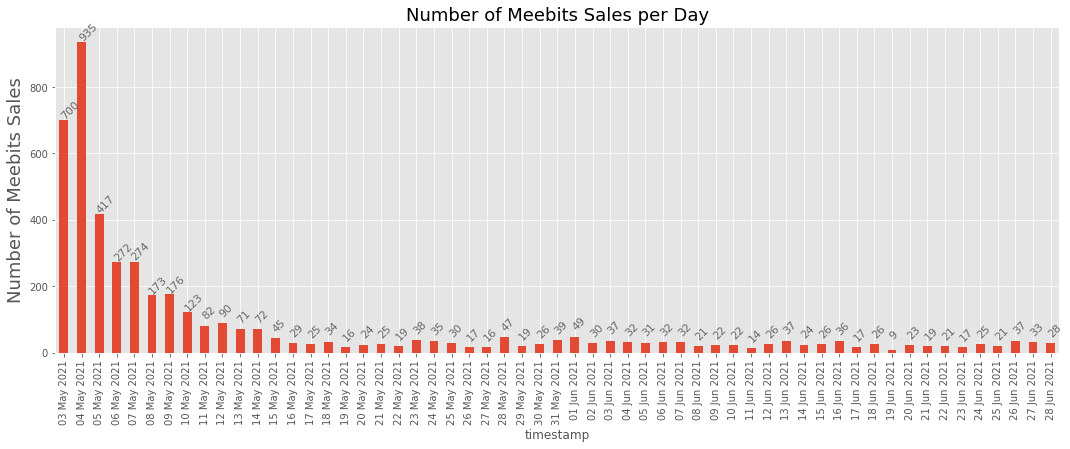

In [14]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').count()['total_price']
ax = data.plot.bar(figsize=(18, 6))

ax.set_alpha(0.8)
ax.set_title("Number of Meebits Sales per Day", fontsize=18)
ax.set_ylabel("Number of Meebits Sales", fontsize=18)

#https://github.com/pandas-dev/pandas/issues/1918
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(data.index.to_series().dt.strftime("%d %b %Y")))

#https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+40, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)

#### Total Sales per Day in ETH

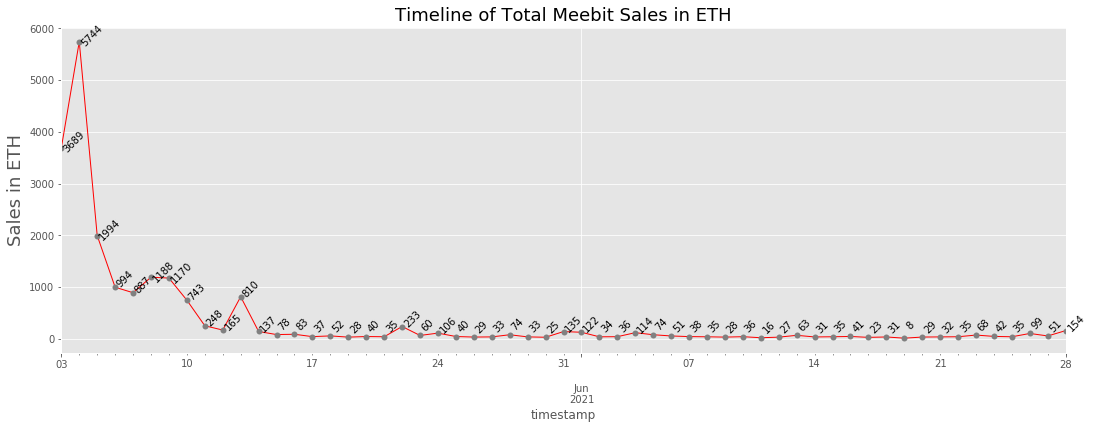

In [15]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').sum()['total_price']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Meebit Sales in ETH", fontsize=18)
ax.set_ylabel("Sales in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.0f}".format(j), xy=(i, j+200), rotation=45)

#### Total Sales per day in USD

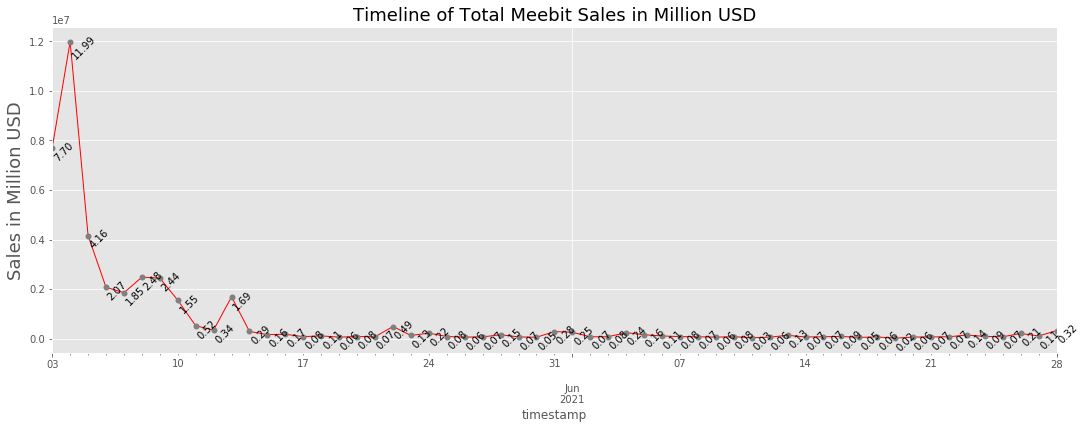

In [16]:
data = meebit_sales_df[['timestamp', 'total_price_usd']].resample('D', on='timestamp').sum()['total_price_usd']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Meebit Sales in Million USD", fontsize=18)
ax.set_ylabel("Sales in Million USD", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.2f}".format(j/10.**6), xy=(i, j), rotation=45)

### 2.2.6. Meebits Prices Timelines 

#### Average Meebit Price per Day in ETH 

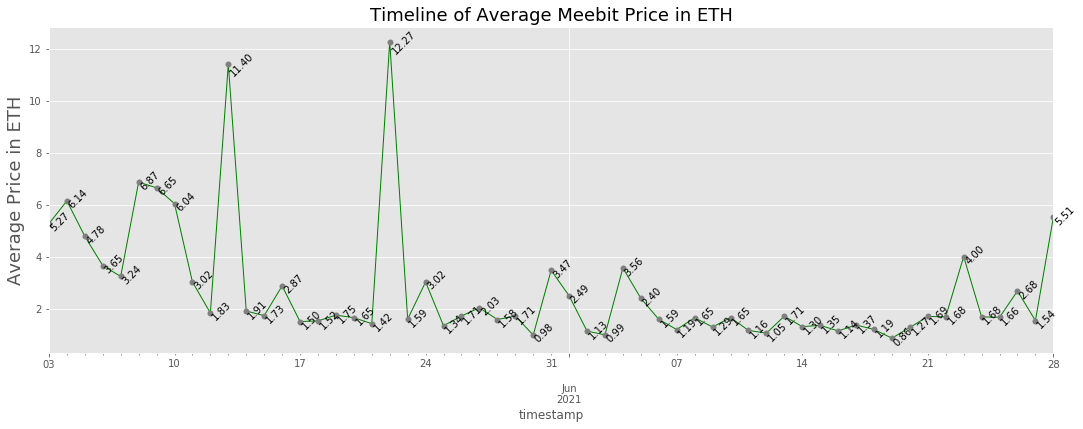

In [17]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').mean()['total_price']
ax = data.plot(figsize=(18,6), color="green", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Average Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Average Price in ETH", fontsize=18);
#ax.annotate(s='sdsdsds', xy=(1, 1))

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.2f}".format(j), xy=(i, j+.2), rotation=45)

#### Floor Meebit Price per Day in ETH

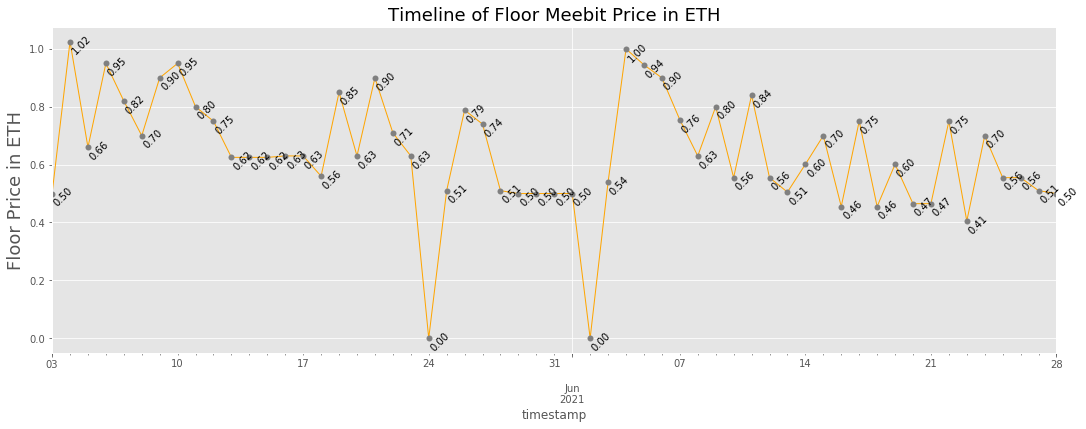

In [18]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').min()['total_price']
ax = data.plot(figsize=(18,6), color="orange", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Floor Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Floor Price in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for d, v in zip(dates, values):
    ax.annotate(s="{:.2f}".format(v), xy=(d, v), rotation=45)

#### Max Meebit Price per Day in ETH

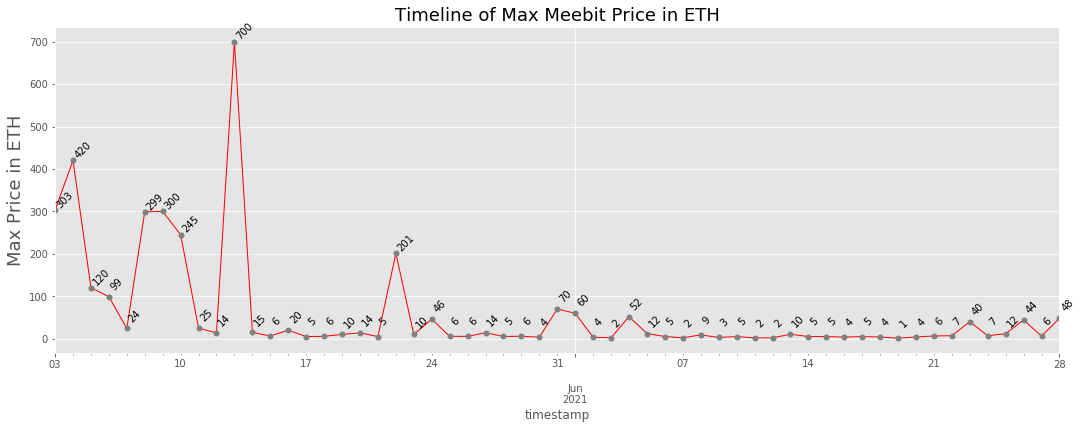

In [19]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').max()['total_price']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Max Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Max Price in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.0f}".format(j), xy=(i, j+30), rotation=45)

### 2.2.6. Analyzing Meebits' Sellers and Buyers

In [20]:
print("There are %d unique Meebit sellers." % len(meebit_sales_df['seller_address'].unique()))
print("There are %d unique Meebit buyers." % len(meebit_sales_df['buyer_address'].unique()))

There are 1328 unique Meebit sellers.
There are 1883 unique Meebit buyers.


#### Getting Top 10 Meebits Buyers

In [21]:
buyers = []
for buyer_address in meebit_sales_df['buyer_address'].value_counts().index[:10]:
    buyer_data = {}
    buyer_data['buyer_address'] = buyer_address
    buyer_data['buyer_username'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['buyer_username'].iloc[0]
    buyer_data['number_buys'] = len(meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address])
    buyer_data['min_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].min()
    buyer_data['max_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].max()
    buyer_data['mean_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].mean()
    buyers.append(buyer_data)
    
pd.DataFrame(buyers)

,buyer_address,buyer_username,number_buys,min_price,max_price,mean_price
0,0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849,meemaster42069,78,0.405,1.09,0.677077
1,0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db,0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db,77,1.600,18.00,2.876748
2,0x54b174179ae825ed630da40b625bb3c883cd40ae,Nate_Rivers,44,0.880,5.00,2.261068
3,0x3612b2e93b49f6c797066ca8c38b7f522b32c7cb,rudya,38,1.330,27.99,5.648113
4,0x4b172710306decf6cfd12e8f0e6b3382d02627ed,PhillyNFT,35,0.700,2.75,1.157266
5,0xab61cc776cc19af7e99d3ba4539435311fa74e8a,pete_d,32,1.750,299.00,26.578125
6,0xee402489d83e2b22d496910f8c810d35a3ad7b25,TweetyPie,29,0.700,6.00,1.648857
7,0x7be6e974dfc6e29515a91b704cf9a0fbc21d1624,jaindl,28,0.700,4.00,1.318232
8,0xda6ad74619e62503c4cbefbe02ae05c8f4314591,KoreanKappa,27,1.000,8.00,2.332155
9,0xa158ffb97cc5b65c7c762b31d3e8111688ee6940,AntekH,27,0.700,1.50,1.037188


#### Getting Top 10 Meebits Sellers

In [22]:
sellers = []
for seller_address in meebit_sales_df['seller_address'].value_counts().index[:10]:
    seller_data = {}
    seller_data['seller_address'] = seller_address
    seller_data['seller_username'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['seller_username'].iloc[0]
    seller_data['number_sales'] = len(meebit_sales_df[meebit_sales_df['seller_address'] == seller_address])
    seller_data['min_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].min()
    seller_data['max_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].max()
    seller_data['mean_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].mean()
    sellers.append(seller_data)
    
pd.DataFrame(sellers)

,seller_address,seller_username,number_sales,min_price,max_price,mean_price
0,0x163ee09deeea9dab68df0ae49f48c8e07ad54aa2,None,87,0.7500,75.000000,3.493678
1,0x8b27de7f6a7542ee70e2420e1bc67fc479d01984,Number5,78,0.5200,52.000000,2.031333
2,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,Pranksy,77,1.0000,299.000000,8.089870
3,0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849,meemaster42069,74,0.6715,1.650000,1.079353
4,0x2d75fb5482d92062cf5c52adf1d9a439dcd38b08,None,60,0.7000,3.000000,0.999767
5,0xb19d7b838ae2e6212fa79e14f52a463e0fc5ea43,meebitfactory,59,0.8000,13.990000,2.464068
6,0x29b1b2d083456fd07b19649f8b85f9927a29b1ab,FutureShop_Bot_6137,56,0.9000,9.500000,1.664379
7,0xba19ba5233b49794c33f01654e99a60e579e6f29,KRO,55,0.8500,5.120000,1.227623
8,0x3e17fac953de2cd729b0ace7f6d4353387717e9e,blockomoco,55,0.7000,44.181826,1.973949
9,0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac,eight8eight,52,0.7550,22.700649,3.108473


#### Intersection of Top 10 Buyers and Top 10 sellers

In [23]:
top_10_buyers = meebit_sales_df['buyer_address'].value_counts().index[:10]
top_10_sellers = meebit_sales_df['seller_address'].value_counts().index[:10]
print(list(set(top_10_buyers) & set(top_10_sellers)))

['0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849']


#### Getting Number of Sales between same Buyers and Sellers 

In [24]:
(meebit_sales_df['seller_address'] + meebit_sales_df['buyer_address']).value_counts().value_counts()

1     4065
2      139
3       35
4       11
6        7
7        4
5        4
11       1
10       1
13       1
dtype: int64

# Conclusion

In this tutorial, we learned how to use Python and OpenSea APIs to collect and analyze Meebits NFTs data. We analyzed sales trends and mebbits prices, and we also looked into the behavior of the top buyers and sellers. The analysis introduced here can be extended to other scenarios or other NFT collections.


# References

[1] [Fungibility - Wikipedia](https://en.wikipedia.org/wiki/Fungibility)

[2] [A Practical Introduction to NFTs using Solidity and Legos](http://adilmoujahid.com/posts/2021/05/intro-nfts-solidity/)

[3] [Counterparty - Wikipedia](https://bit.ly/3h6IfMU)

[4] [Counterparty - Bitcoinwiki](https://bit.ly/2T79teI)

[5] [Rare Pepe Gets Blockchained, Made Into Tradable Counterparty Tokens](https://news.bitcoin.com/rare-pepe-assets-get-blockchained/)